In [1]:
# Stochastic Gradient Descent vs Batch Gradient Descent vs Mini Batch Gradient Descent

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
import random

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
df[['area', 'bedrooms', 'price']] = MinMaxScaler().fit_transform(df[['area', 'bedrooms', 'price']])
df.head()

,area,bedrooms,price
0,0.088276,0.25,0.052370
1,0.620690,0.75,0.651852
2,0.220690,0.50,0.222222
3,0.248621,0.50,0.318519
4,0.137931,0.25,0.140741


In [5]:
df.shape

(20, 3)

# 1.1) Stochastic Gradient Descent Easy

In [6]:
def gradientDescentSGDEasy(x, y_true):
    w1 = w2 = 1
    bias = 0
    learning_rate = 0.01
    n = len(x)
    
    cost_ = []
    epoch_ = []
    
    for i in range(500):
        y_pred = w1*x['area'] + w2*x['bedrooms'] + bias
        
        w1d = (-2/n)*sum((y_true - y_pred)*x['area'])
        w2d = (-2/n)*sum((y_true - y_pred)*x['bedrooms'])
        biasd = -(2/n)*np.sum(y_true-y_pred)
        
        cost = 1/len(x)*sum([val**2 for val in (y_true-y_pred)])
        
        w1 = w1 - learning_rate*w1d
        w2 = w2 - learning_rate*w2d
        bias = bias - learning_rate*biasd
        
        if i%10 == 0:
            cost_.append(cost)
            epoch_.append(i)
#             print(f'EPOCH: {i}, W1: {w1}, W2: {w2}, COST: {cost}, BIAS: {biasd}')
            
    return cost_, epoch_

In [7]:
cost_, epoch_ = gradientDescentSGDEasy(df[['area', 'bedrooms']], df.price)

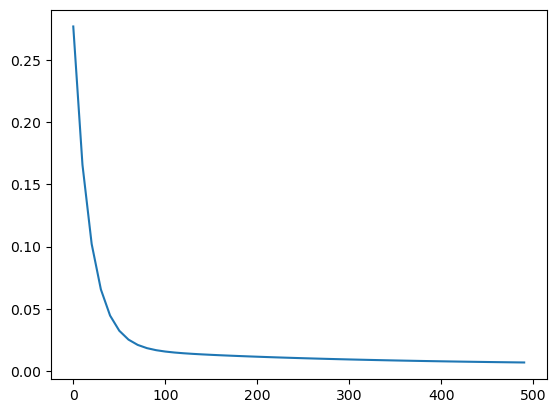

In [8]:
plt.plot(epoch_, cost_)

# 1.2) Stochastic GRADIENT DESCENT TYPICAL

In [9]:
X = df.drop('price', axis='columns')
y = df.price

In [10]:
X.sample(2)

,area,bedrooms
8,0.175862,0.50
12,0.068966,0.25


In [11]:
y.sample(2)

7     0.911111
13    0.059259
Name: price, dtype: float64

In [12]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
y_scaler = scaler.fit_transform(y.values.reshape(y.shape[0], 1))

In [13]:
X_scaler[:3]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ]])

In [14]:
y_scaler[:3]

array([[0.05237037],
       [0.65185185],
       [0.22222222]])

In [15]:
X_scaler.T.shape

(2, 20)

In [16]:
X_scaler.shape

(20, 2)

In [17]:
y_scaler.shape

(20, 1)

In [18]:
y_scaler.T.shape

(1, 20)

In [19]:
def gradientDescentSGDTypical(x, y_true):
    W = np.ones(x.shape[1])
    bias = 0
    learning_rate = 0.01
    n = len(x)
    
    costing_ = []
    epoches_ = []
    
    for i in range(500):
        y_pred = x.dot(W) + bias
        
        dw = -(2/n)*x.T.dot(y_true-y_pred)
        db = -(2/n)*np.sum(y_true-y_pred)
        
        cost = np.mean(np.square(y_true-y_pred))
        
        W = W - learning_rate*dw
        bias = bias - learning_rate*db
        
        if i%10 == 0:
            costing_.append(cost)
            epoches_.append(i)
        
    return costing_, epoches_

In [20]:
costing_, epoches_ = gradientDescentSGDTypical(X_scaler, y_scaler.reshape(y_scaler.shape[0]))

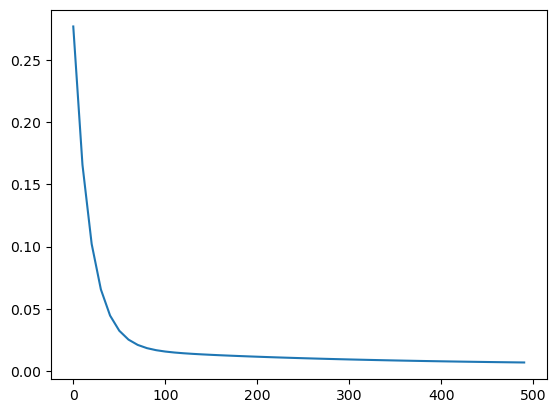

In [21]:
plt.plot(epoches_, costing_)

# 1.3) STOCHASTIC GRADIENT DESCENT

In [22]:
def gradientDescentBatch(X, y_true):
    w1 = w2 = 1
    bias = 0
    n = len(X)
    learning_rate = 0.01
    
    cost_ = []
    epoch_ = []
    
    for i in range(2):
        y_pred = w1*X['area'] + w2*X['bedrooms'] + bias
        
        cost = np.mean(np.square(y_true-y_pred))
        
        dw1 = -(2/n)*(sum([val**2 for val in (y_true-y_pred)]*X['area']))
        dw2 = -(2/n)*(sum([val**2 for val in (y_true-y_pred)]*X['bedrooms']))
        dbias = (-2/n)*sum(y_true - y_pred)
        
        w1 = w1 - learning_rate*dw1
        w2 = w2 - learning_rate*dw2
        bias = bias - learning_rate*dbias
        
        if i%10 == 0:
            cost_.append(cost)
            epoch_.append(i)

gradientDescentBatch(df[['area', 'bedrooms']], df.price)

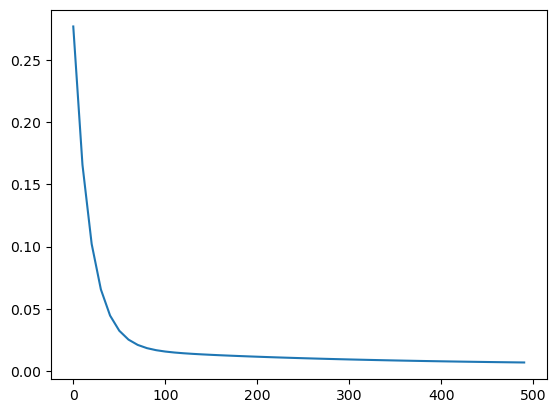

In [23]:
plt.plot(epoches_, costing_)

# 2.1) BATCH GRADIENT DESCENT

In [24]:
def gradientDescentBatchEasy(X, y_true):
    w1 = w2 = 1
    bias = 0
    n = len(X)
    learning_rate = 0.01
    
    batch_cost_ = []
    batch_epoch_ = []
    
    for i in range(1500):
        X_ = X['area'][random.randint(0, n-1)]
        Y_ = X['bedrooms'][random.randint(0, n-1)]
        y_ = y_true[random.randint(0, n-1)]
        
        y_pred = w1*X_ + w2*Y_ + bias
        
        cost = np.mean(np.square(y_-y_pred))
        
        dw1 = -(2/n)*(sum([[val**2 for val in np.array([y_-y_pred])][0]*X_]))
        dw2 = -(2/n)*(sum([[val**2 for val in np.array([y_-y_pred])][0]*Y_]))
        dbias = (-2/n)*sum([y_ - y_pred])
        
        w1 = w1 - learning_rate*dw1
        w2 = w2 - learning_rate*dw2
        bias = bias - learning_rate*dbias
        
        if i%10 == 0:
            batch_cost_.append(cost)
            batch_epoch_.append(i)
            
    return batch_cost_, batch_epoch_

batch_cost_, batch_epoch_ = gradientDescentBatchEasy(df[['area', 'bedrooms']], df.price)

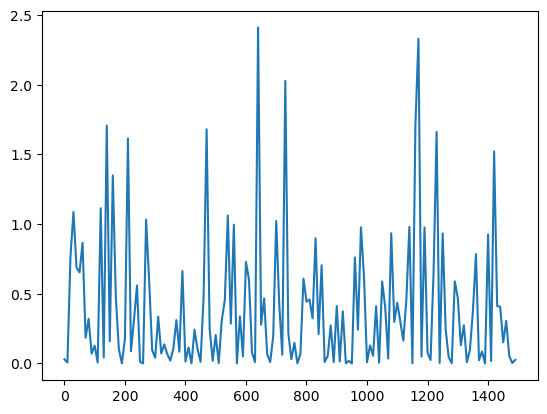

In [25]:
plt.plot(batch_epoch_, batch_cost_)

In [26]:
def gradientDescentBatchTypical(X, y_true):
    W = np.ones(X.shape[1])
    n = len(X)
    bias = 0
    learning_rate = 0.01
    
    cost_batch = []
    epoch_batch = []
    
    for i in range(1500):
        XR = X[random.randint(0, n-1)]
        YR = y_true[random.randint(0, n-1)]
        
        y_pred = XR.dot(W) + bias
        
        dw = -(2/n)*(XR.T.dot(YR-y_pred))
        db = -(2/n)*np.sum(YR-y_pred)
        
        cost = np.mean(np.square(y_pred-YR))
        
        W = W - learning_rate*dw
        bias = bias - learning_rate*db
        
        if i%10 == 0:
            cost_batch.append(cost)
            epoch_batch.append(i)
        
    return cost_batch, epoch_batch

        
cost_batch, epoch_batch = gradientDescentBatchTypical(X_scaler, y_scaler.reshape(y_scaler.shape[0]))

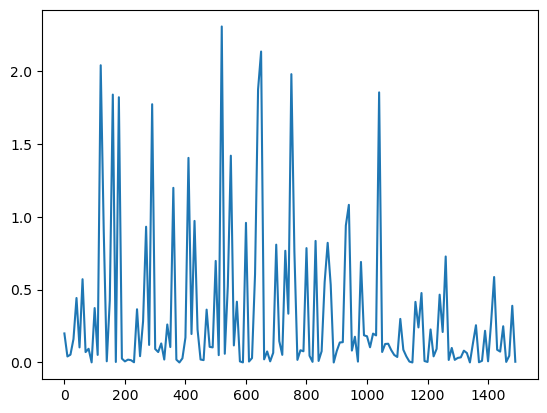

In [27]:
plt.plot(epoch_batch, cost_batch)